**Rationale** In this assignment, you will practice specifying, running, and interpreting regressions involving non-linear functional forms and heterogeneous effects. You will be using the datasets located in your Datasets folder.

1. Avocado dataset
1. Starbucks campaign data

Helpful reference:
https://data.library.virginia.edu/interpreting-log-transformations-in-a-linear-model/


In [ ]:
import pandas as pd, numpy as np, os, matplotlib.pyplot as plt
from statsmodels.formula import api as smf
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
fpath = 'drive/My Drive/school/2023_fall/courses/suu/03-anly4100/assignments/05_assignment/data/' # change to your data folder
os.listdir(fpath)

['starbucks_promos.csv', 'avocado.csv']

# Problem 1 (50 points) Avocado prices

**Only use data for conventional types and remove the data for the region TotalUS**

First, write a loop through each unique region to plot the
1. Total Volume vs. Average Price
1. Total Volume vs. ln(Average Price)
1. ln(Total Volume) vs. Average Price
1. ln(Total Volume) vs. ln(Average Price)

For each of the above 4 plots, the syntax should look something like:
```
for r in df.region.unique():
    temp = df[df.region==r]
    plt.scatter(....) # fill this in
```

1. Which of the plots of the relationship between price and demand looks most "linear?"


In [ ]:
# read in the dataset and replace column name spaces with underscores
avocado = pd.read_csv(fpath + 'avocado.csv', index_col = 0)
avocado.columns = [c.replace(' ', '_') for c in avocado.columns]

avocado

,Date,AveragePrice,Total_Volume,4046,4225,4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [ ]:
# select regions that are not TotalUS e.g. region != 'TotalUS' and only conventional types
avocado_filtered_df = avocado[(avocado['region'] != 'TotalUS') & (avocado['type'] == 'conventional')]


In [ ]:
# check the unique regions to make sure TotalUS is not in the region column
avocado_filtered_df['region'].unique()
# print(unique_regions)

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'West', 'WestTexNewMexico'], dtype=object)

In [ ]:
# check the unique types to make sure there are only conventional types
avocado_filtered_df['type'].unique()

array(['conventional'], dtype=object)

Text(0, 0.5, 'Total Volume')

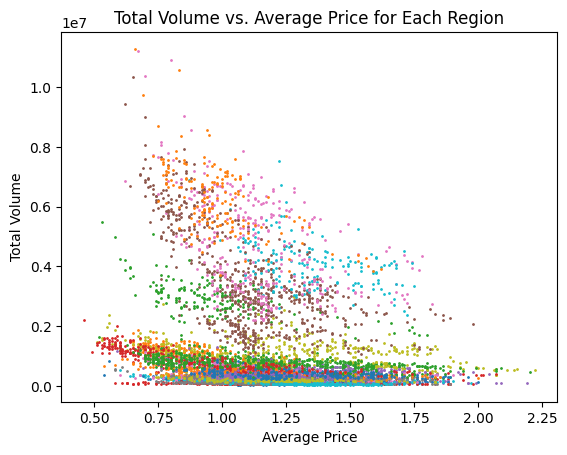

In [ ]:
# write a loop to plot total volume vs average price (e.g. Y vs. X) and color each region differently
# e.g.:
# for r in avocado.region.unique():
#     temp = avocado.loc[avocado.region == r]
#     p
for r in avocado_filtered_df.region.unique():
    temp = avocado_filtered_df.loc[avocado.region == r]
    plt.scatter(temp.AveragePrice, temp.Total_Volume, s=1, label=r)

plt.title('Total Volume vs. Average Price for Each Region')
plt.xlabel('Average Price')
plt.ylabel('Total Volume')


Text(0.5, 0, 'ln(Average Price)')

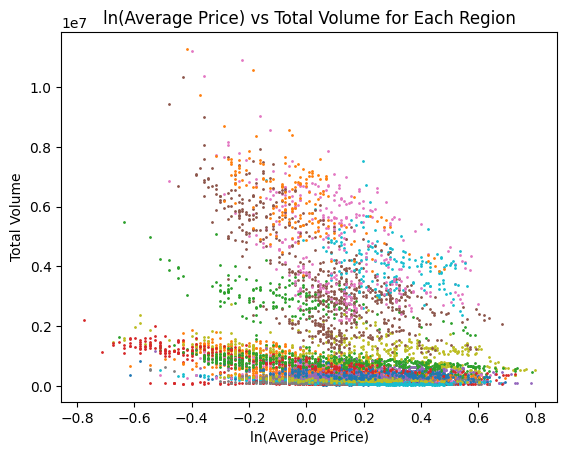

In [ ]:
# do the same, but now plot total volume vs. ln(average price)
# remember np.log() takes the log

for r in avocado_filtered_df.region.unique():
    temp = avocado_filtered_df.loc[avocado.region == r]
    plt.scatter(np.log(temp.AveragePrice), temp.Total_Volume, s=1, label=r)

plt.title('ln(Average Price) vs Total Volume for Each Region')
plt.ylabel('Total Volume')
plt.xlabel('ln(Average Price)')

Text(0, 0.5, 'ln(Total Volume)')

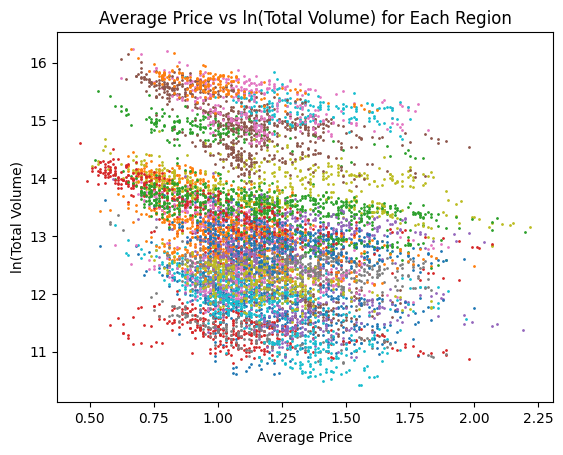

In [ ]:
# do the same, but now plot ln(Total_Volume) vs. AveragePrice
for r in avocado_filtered_df.region.unique():
    temp = avocado_filtered_df.loc[avocado.region == r]
    plt.scatter(temp.AveragePrice, np.log(temp.Total_Volume), s=1, label=r)

plt.title('Average Price vs ln(Total Volume) for Each Region')
plt.xlabel('Average Price')
plt.ylabel('ln(Total Volume)')

Text(0.5, 0, 'ln(Average Price)')

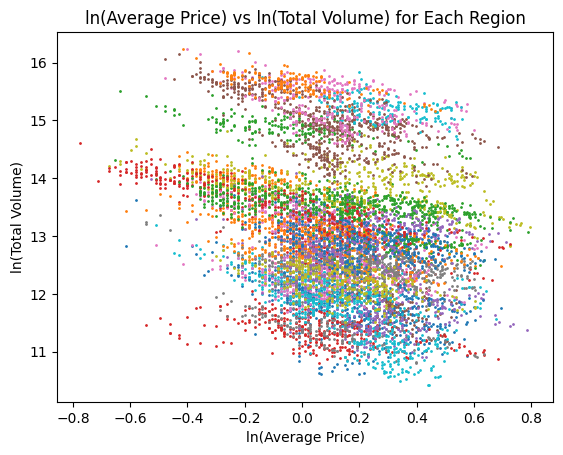

In [ ]:
# do the same, but now plot ln(Total_Volume) vs. ln(AveragePrice)
for r in avocado_filtered_df.region.unique():
    temp = avocado_filtered_df.loc[avocado.region == r]
    plt.scatter(np.log(temp.AveragePrice), np.log(temp.Total_Volume), s=1, label=r)

plt.title('ln(Average Price) vs ln(Total Volume) for Each Region')
plt.ylabel('ln(Total Volume)')
plt.xlabel('ln(Average Price)')


**EDIT THIS CELL**

Which plot seems to exhibit the most linear relationship within each region? (i.e. dots of the same color seem to form closest to a straight line).

The plot that seems to exhibit the most linear relationship, is the **ln(Average Price) vs ln(Total Volume)** plot. This suggests that the **log-log** model may be most appropriate.

(*models can be level-level, log-log, level-log, log-level.*)


## Regression Model
Using the avocado dataset, estimate the following demand models while accounting for the region effects (incl region in the regression):

1. level - level
1. log - level
1. level - log
1. log - log

Answer the following:
1. Succinctly interpret the **price coefficient** for each model (pay attention to corresponding p-values as well).


**Review:** To summarize the various log transformations.

|Model| Dept. Var. | Expl. Var. | Approx. Interpretation | Exact interpretation|
|---|---|---|---|---|
|**level-log** $$y=\beta_0+\beta_1ln(x)+e$$ | $y$ | $ln(x)$ | $$\Delta y = \frac{\beta_1}{100}\%\Delta x$$ | $$\Delta y = \beta_1 ln(\frac{100+\%\Delta X}{100})$$|
|**log-level** $$ln(y)=\beta_0+\beta_1x+e$$ | $ln(y)$ | x |$$\%\Delta y = 100\cdot\beta_1\Delta x$$ | $$\%\Delta y = 100\cdot (e^{\beta_1}-1)\Delta x$$ |
|**log-log** $$ln(y)=\beta_0+\beta_1ln(x)+e$$ | $ln(y)$ | $ln(x)$ | $$\%\Delta y = \beta_1\%\Delta x$$ | $$\bigg(\big(1+\% \Delta x/100\big)^{\beta_1}-1\bigg)\times 100 $$|

The approximate interpretations are roughly accurate for small changes in $x$, particularly if the magnitude of $\beta_1$ is small (whether positive or negative).


If you've forgotten what logarithms are from algebra/precalc, please [review](https://www.youtube.com/watch?v=_divhRCjVok).


In [ ]:
avocado_filtered_df.columns

Index(['Date', 'AveragePrice', 'Total_Volume', '4046', '4225', '4770',
       'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge_Bags', 'type', 'year',
       'region'],
      dtype='object')

In [ ]:
# run the level-level regression of Total Volume on Average Price
# while accounting for regions as an additional explanatory variable.
res_level_level = smf.ols('Total_Volume ~ AveragePrice + region', data = avocado_filtered_df).fit()
# print the regression table below
print(res_level_level.summary())


                            OLS Regression Results                            
Dep. Variable:           Total_Volume   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     3232.
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:22:14   Log-Likelihood:            -1.2705e+05
No. Observations:                8957   AIC:                         2.542e+05
Df Residuals:                    8903   BIC:                         2.546e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

**Edit this cell**

For the level-level regression, explain the coefficient for the price variable:

1. Answer here:
If you increase the average price by a dollar, you will lose 576,700 of conventional avocados in sales.

In [ ]:
# run the log-level regression of Total Volume on Average Price
# while accounting for regions as an additional explanatory variable.

res_log_level = smf.ols('np.log(Total_Volume) ~ AveragePrice + region', data = avocado_filtered_df).fit()

# Print the regression table below
print(res_log_level.summary())

                             OLS Regression Results                             
Dep. Variable:     np.log(Total_Volume)   R-squared:                       0.975
Model:                              OLS   Adj. R-squared:                  0.975
Method:                   Least Squares   F-statistic:                     6552.
Date:                  Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                          11:22:26   Log-Likelihood:                 2047.2
No. Observations:                  8957   AIC:                            -3986.
Df Residuals:                      8903   BIC:                            -3603.
Df Model:                            53                                         
Covariance Type:              nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

**Edit this cell**

For the log-level regression, explain the coefficient for the price variable:

1. Answer here:
If you increase the average price by $1, the total volume of coventional avocados would decrease by 57.86%

In [ ]:
# run the level-log regression of Total Volume on Average Price
# while accounting for regions as an additional explanatory variable.

res_level_log = smf.ols('Total_Volume ~ np.log(AveragePrice) + region', data = avocado_filtered_df).fit()

# Print the regression table below
print(res_level_log.summary())


                            OLS Regression Results                            
Dep. Variable:           Total_Volume   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     3308.
Date:                Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:22:49   Log-Likelihood:            -1.2695e+05
No. Observations:                8957   AIC:                         2.540e+05
Df Residuals:                    8903   BIC:                         2.544e+05
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

**Edit this cell**

For the level-log regression, explain the coefficient for the price variable:

1. Answer here:
If you increase the average price by 1%, the total volume of conventional avocados decreases by 748,000.

In [ ]:
# run the log-log regression of Total Volume on Average Price
# while accounting for regions as an additional explanatory variable.

res_log_log = smf.ols('np.log(Total_Volume) ~ np.log(AveragePrice) + region', data = avocado_filtered_df).fit()

# Print the regression table below
print(res_log_log.summary())


                             OLS Regression Results                             
Dep. Variable:     np.log(Total_Volume)   R-squared:                       0.976
Model:                              OLS   Adj. R-squared:                  0.976
Method:                   Least Squares   F-statistic:                     6817.
Date:                  Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                          11:23:24   Log-Likelihood:                 2220.8
No. Observations:                  8957   AIC:                            -4334.
Df Residuals:                      8903   BIC:                            -3950.
Df Model:                            53                                         
Covariance Type:              nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

**Edit this cell**

For the log-log regression, explain the meaning of the coefficient for the price variable:

1. Answer here:

As you increase average price by 1%, the total volume decreases by 72.22%.




# Problem 2 (50 points)

Use the Starbucks promotions data. Filter the data to use only the rows satisfying all of the following conditions:

1. Transaction amount more than 0 and less than 50.
1. Income is not missing (df.income.notnull())

We suspect the average transaction value might be higher for individuals with higher incomes. We also suspect that the higher the offer difficulty (min. amount spend needed to redeem), the higher the spend. However, this effect might be different depending on income. Additionally, the offer type (buy one get one vs. discount) may impact the transaction amount. Moreover, this effect of the offer type may differ depending on income.

1. To capture all of these potential effects, run the following regression:
$$
ln(\text{Trans Amt}) = \beta_0 + \beta_1 ln(\text{Inc}) + \beta_2 \text{difficulty} + \beta_3 \text{Disc Offer} + \beta_4 ln(\text{Inc})\times \text{difficulty} + \beta_5  ln(\text{Inc})\times \text{Disc Offer}+ e
$$

1. Succinctly interpret the regression results.

**Edit this cell**

Demonstrate your understanding of interpretating regressions here by filling the blanks in the statements below:

1. In terms of the $\beta's$ in the equation above, 1% increase in income when a discount offer is made and qualification difficulty is \$10 leads to approximately [$\beta_1 + \beta_4(10) + \beta_5(1)$]% change in transaction amount.
1. In terms of the $\beta's$ in the equation above, 1% increase in income when a BOGO offer is made and qualification difficulty is \$5 leads to approximately [$\beta_1 + \beta_4(5) + \beta_5(0)$]% change in transaction amount.

**Remember** the solution here is not as simple as looking at a single coefficient. The effect of income depends on offer type and difficulty.

Note, you can re-write the equation as:
$$
ln(\text{Trans Amt}) = \beta_0  + \beta_2 \text{difficulty} + \beta_3 \text{Disc Offer}  + \big[\beta_1 + \beta_4 \text{difficulty} + \beta_5 \text{Disc Offer}  \big] \times ln(\text{Inc})+ e
$$

Where the entire effect of $ln(income)$ on $ln(TransactionAmount)$ is captured by the expression $\big[\beta_1 + \beta_4 \text{difficulty} + \beta_5 \text{Disc Offer}  \big]$.

In [ ]:
sb = pd.read_csv(fpath + 'starbucks_promos.csv', index_col=0) # read the starbucks data
sb.head()

,uid,event,time,gender,age,register_date,income,offer_id,offer_reward,channels,difficulty,duration,offer_type,offer_time,transaction_amount,redeem_time,redeemed
1,0020c2b971eb4e9188eac86d93036a77,offer received,0,F,59,20160304,90000.0,fafdcd668e3743c1bb461111dcafc2a4,2.0,"['web', 'email', 'mobile', 'social']",10.0,240.0,discount,0.0,17.63,54.0,1
4,005500a7188546ff8a767329a2f7c76a,offer received,0,M,56,20171209,47000.0,ae264e3637204a6fb9bb56bc8210ddfd,10.0,"['email', 'mobile', 'social']",10.0,168.0,bogo,0.0,NaN,NaN,0
5,0056df74b63b4298809f0b375a304cf4,offer received,0,M,54,20160821,91000.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,"['web', 'email', 'mobile']",5.0,168.0,bogo,0.0,27.86,132.0,1
6,00715b6e55c3431cb56ff7307eb19675,offer received,0,F,58,20171207,119000.0,ae264e3637204a6fb9bb56bc8210ddfd,10.0,"['email', 'mobile', 'social']",10.0,168.0,bogo,0.0,27.26,12.0,1
8,00840a2ca5d2408e982d56544dc14ffd,offer received,0,M,26,20141221,61000.0,2906b810c7d4411798c6938adc9daaa5,2.0,"['web', 'email', 'mobile']",10.0,168.0,discount,0.0,6.05,540.0,1


In [ ]:
# select rows with transactions >0 but <50 and income is not missing
sb_filtered = sb.loc[(sb['transaction_amount'] > 0) & (sb['transaction_amount'] < 50) & sb['income'].notnull(), :]



# replace sb with the result of the selection
sb = sb_filtered

# Display the first few rows of the filtered DataFrame
#print(sb.head())

# creating columns with log for trans amount and income
sb['log_trans']=np.log(sb['transaction_amount'])
sb['log_inc']=np.log(sb['income'])

sb.head()

<ipython-input-16-1609a350f2f9>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb['log_trans']=np.log(sb['transaction_amount'])
<ipython-input-16-1609a350f2f9>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb['log_inc']=np.log(sb['income'])


,uid,event,time,gender,age,register_date,income,offer_id,offer_reward,channels,difficulty,duration,offer_type,offer_time,transaction_amount,redeem_time,redeemed,log_trans,log_inc
1,0020c2b971eb4e9188eac86d93036a77,offer received,0,F,59,20160304,90000.0,fafdcd668e3743c1bb461111dcafc2a4,2.0,"['web', 'email', 'mobile', 'social']",10.0,240.0,discount,0.0,17.63,54.0,1,2.869602,11.407565
5,0056df74b63b4298809f0b375a304cf4,offer received,0,M,54,20160821,91000.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,"['web', 'email', 'mobile']",5.0,168.0,bogo,0.0,27.86,132.0,1,3.327192,11.418615
6,00715b6e55c3431cb56ff7307eb19675,offer received,0,F,58,20171207,119000.0,ae264e3637204a6fb9bb56bc8210ddfd,10.0,"['email', 'mobile', 'social']",10.0,168.0,bogo,0.0,27.26,12.0,1,3.305420,11.686879
8,00840a2ca5d2408e982d56544dc14ffd,offer received,0,M,26,20141221,61000.0,2906b810c7d4411798c6938adc9daaa5,2.0,"['web', 'email', 'mobile']",10.0,168.0,discount,0.0,6.05,540.0,1,1.800058,11.018629
11,0091d2b6a5ea4defaa8393e4e816db60,offer received,0,F,62,20160617,81000.0,4d5c57ea9a6940dd891ad53e9dbe8da0,10.0,"['web', 'email', 'mobile', 'social']",10.0,120.0,bogo,0.0,18.26,6.0,1,2.904713,11.302204


In [ ]:
# run the regression here, store the result as the variable res


# res = smf.ols('np.log(transaction_amount) ~ difficulty + offer_type + (income + difficulty + offer_type )*np.log(income)', data = sb).fit()
res = smf.ols('np.log(transaction_amount) ~ log_inc + difficulty + C(offer_type) + log_inc*difficulty + log_inc*C(offer_type)', data = sb).fit()
rsquared, params, pvalues = res.rsquared, res.params, res.pvalues

In [ ]:
# print the result summary here, e.g. print(res.summary()):
print(res.summary())


                                OLS Regression Results                                
Dep. Variable:     np.log(transaction_amount)   R-squared:                       0.409
Model:                                    OLS   Adj. R-squared:                  0.409
Method:                         Least Squares   F-statistic:                     4243.
Date:                        Sat, 09 Dec 2023   Prob (F-statistic):               0.00
Time:                                11:23:52   Log-Likelihood:                -21161.
No. Observations:                       30695   AIC:                         4.233e+04
Df Residuals:                           30689   BIC:                         4.238e+04
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

[$\beta_1 + \beta_4(10) + \beta_5(1)$]% change

In [ ]:
1.1575 + (-0.0316 * 10) + (0.4724 * 1)

1.3138999999999998

[$\beta_1 + \beta_4(5) + \beta_5(0)$]% change

In [ ]:
1.1575 + (-0.0316 * 5) + (0.4724 * 0)

0.9994999999999999

**Edit this cell**

Demonstrate your understanding of interpretation of the regression here by filling the blanks in the statements below:

1. In terms of the the estimated coefficients, 1% increase in income when discount offer is made and qualification difficulty is \$10 leads to approximately 1.3139% **increase** in transaction amount.
1. In terms of the estimated coefficients, 1% increase in income when BOGO offer is made and qualification difficulty is \$5 leads to 0.9995% **decrease** in transaction amount.

**Basically,** substitute the $\beta's$ from the answer above with the estimated coefficients.